<a href="https://colab.research.google.com/github/vikrantpotnis123/DS/blob/master/tensor_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
!pip install torch
print(torch.cuda.is_available()) 

False


In [167]:
import torch
import numpy as np
from torch.autograd import Variable
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

In [168]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


    Vectors are 1-dimensional tensors.
    Matrices are 2-dimensional tensors
    Tensors are generalized N-dimensional tensors. N can be anything from 3 to infinity…
    A table is naturally equivalent to a 2-D matrix where an individual row (or instance) or individual column (or feature) can be treated as a 1-D vector.
    Similarly, a black-and-white image can be treated as a 2-D matrix containing numbers 0 or 1. 
    This can be fed into a neural network for image classification or segmentation tasks
    A time-series or sequence data (e.g., ECG data from a monitoring machine or a stock market price tracking data stream) is another example of 2-D data where one dimension (time) is fixed.
    Going beyond 2-D, a color or grayscale image can be treated as a 3-D tensor where each pixel is associated with a so-called ‘color-channel’ – a vector of 3 numbers representing intensities in the Red-Green-Blue (RGB) spectrum. 
    This is an example of a 3-D tensor.
    Videos can be thought of as sequences of color images (or frames) in time and can be thought of as 4-D tensors.

In [169]:
#1-d tensor from a list
t1 = torch.tensor([x for x in  range(4)])
t1

tensor([0, 1, 2, 3])

In [170]:
print(t1.ndim, t1.size(), t1.type())

1 torch.Size([4]) torch.LongTensor


In [171]:
t2 = t1.reshape(2,2)
t2

tensor([[0, 1],
        [2, 3]])

In [172]:
# convert numpy <=> tensor
t_from_n = torch.from_numpy(np.array([1., 2., 3., 4.]))
print(t_from_n)
n_from_t = t_from_n.numpy()
print(n_from_t)

tensor([1., 2., 3., 4.], dtype=torch.float64)
[1. 2. 3. 4.]


In [173]:
# convert pandas <=> tensor
pd_series = pd.Series([2., 3., 4., 5.])
pd_to_t  = torch.from_numpy(pd_series.values)
print(pd_to_t)

tensor([2., 3., 4., 5.], dtype=torch.float64)


In [174]:
# convert to list
print(pd_to_t.tolist())

[2.0, 3.0, 4.0, 5.0]


In [175]:
# add two vectors
u = torch.Tensor([x for x in np.arange(2.1, 11.1, 1.0)])
print(u)

v = torch.Tensor([x for x in np.arange(1.1, 10.1, 1.0)])
print(v)

print(u+v)

# add scalar
w = 5.
print(u+v+w)

# product of two vectors
print(u*v)

# product of vector and scalar
print(u*v*10)

tensor([ 2.1000,  3.1000,  4.1000,  5.1000,  6.1000,  7.1000,  8.1000,  9.1000,
        10.1000])
tensor([1.1000, 2.1000, 3.1000, 4.1000, 5.1000, 6.1000, 7.1000, 8.1000, 9.1000])
tensor([ 3.2000,  5.2000,  7.2000,  9.2000, 11.2000, 13.2000, 15.2000, 17.2000,
        19.2000])
tensor([ 8.2000, 10.2000, 12.2000, 14.2000, 16.2000, 18.2000, 20.2000, 22.2000,
        24.2000])
tensor([ 2.3100,  6.5100, 12.7100, 20.9100, 31.1100, 43.3100, 57.5100, 73.7100,
        91.9100])
tensor([ 23.1000,  65.1000, 127.1000, 209.1000, 311.1000, 433.1000, 575.1000,
        737.1001, 919.1000])


In [176]:
# matrix 
u = torch.tensor([ [1., 2.], [3., 4.]])
print(u)
v = torch.tensor([ [11., 22.], [33., 44.]])
print(v)

# matrix - element wise product
print(u*v)

# matrix - dot product
print(u.shape)
print(v.shape)
print(torch.mm(u, v))

w = torch.tensor(np.arange(12)).reshape(4,3)
print(w)
print(w.ndim)

# matrix slice and dice
print(w[0,2])
print(w[0:3, 1:3])

# matrix transpose
print(w.transpose(0, 1))

# matrix transpose, here -1 means second dim is adjused automatically
print(w.transpose(0, 1))

# matrix transpose, here -1 means second dim is adjused automatically
print(w.transpose(-1, 0))

tensor([[1., 2.],
        [3., 4.]])
tensor([[11., 22.],
        [33., 44.]])
tensor([[ 11.,  44.],
        [ 99., 176.]])
torch.Size([2, 2])
torch.Size([2, 2])
tensor([[ 77., 110.],
        [165., 242.]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
2
tensor(2)
tensor([[1, 2],
        [4, 5],
        [7, 8]])
tensor([[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]])
tensor([[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]])
tensor([[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]])


In [177]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=torch.device("cpu"), dtype=torch.float) # vs np.random.randn(N, D_in)
y = torch.randn(N, D_out, device=torch.device("cpu"), dtype=torch.float)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=torch.device("cpu"), dtype=torch.float)
w2 = torch.randn(H, D_out, device=torch.device("cpu"), dtype=torch.float)

In [178]:
torch.manual_seed(5)
model = Linear(N, D_in)

In [179]:
# first derivative
def f_of_x(x):
    return x**3 + 8*x**2 + 4*x + 5
print(f_of_x(10.0))

def first_derivative(x):
  return 3*x**2 + 16*x + 4

print(first_derivative(10.0))



1845.0
464.0


In [180]:
x = torch.tensor(10.0, requires_grad=True)
print(x)
y = f_of_x(x)
print(y)

# compute gradient / first derivative
z = y.backward()

# get that derivative and print it 
# compare with the value in previous cell
print(x.grad)

tensor(10., requires_grad=True)
tensor(1845., grad_fn=<AddBackward0>)
tensor(464.)


In [181]:
# partial derivatives

def f_of_x_y(x,y ):
    return x**3 + y**3 + 8*x**2 + 8*y**2 + 4*x + 4*y + 5
print(f_of_x(10.0))

def partital_derivative_x(x):
  return 3*x**2 + 16*x + 4

def partital_derivative_y(y):
  return 3*y**2 + 16*y + 4

print(partital_derivative_x(10.0))
print(partital_derivative_y(20.0))

1845.0
464.0
1524.0


In [182]:
x = torch.tensor(10.0, requires_grad=True)
y = torch.tensor(20.0, requires_grad=True)
print(x, y)
r = f_of_x_y(x,y)
print(r)

# compute gradient / first derivative
z = r.backward(retain_graph=True)

# get that derivative and print it 
# compare with the value in previous cell
print(x.grad)
print(y.grad)

tensor(10., requires_grad=True) tensor(20., requires_grad=True)
tensor(13125., grad_fn=<AddBackward0>)
tensor(464.)
tensor(1524.)


In [183]:
# derivative w.r.t vector
x = torch.linspace(-20.0, 20.0, requires_grad=True)
print("x = " + str(x))
y = f_of_x(x)
print("y = " + str(y))

r = torch.sum(y)
print("r = " + str(r))
r.backward(retain_graph=True)
print("x.grad = " + str(x.grad))


x = tensor([-20.0000, -19.5960, -19.1919, -18.7879, -18.3838, -17.9798, -17.5758,
        -17.1717, -16.7677, -16.3636, -15.9596, -15.5556, -15.1515, -14.7475,
        -14.3434, -13.9394, -13.5354, -13.1313, -12.7273, -12.3232, -11.9192,
        -11.5152, -11.1111, -10.7071, -10.3030,  -9.8990,  -9.4949,  -9.0909,
         -8.6869,  -8.2828,  -7.8788,  -7.4747,  -7.0707,  -6.6667,  -6.2626,
         -5.8586,  -5.4545,  -5.0505,  -4.6465,  -4.2424,  -3.8384,  -3.4343,
         -3.0303,  -2.6263,  -2.2222,  -1.8182,  -1.4141,  -1.0101,  -0.6061,
         -0.2020,   0.2020,   0.6061,   1.0101,   1.4141,   1.8182,   2.2222,
          2.6263,   3.0303,   3.4343,   3.8384,   4.2424,   4.6465,   5.0505,
          5.4545,   5.8586,   6.2626,   6.6667,   7.0707,   7.4747,   7.8788,
          8.2828,   8.6869,   9.0909,   9.4949,   9.8990,  10.3030,  10.7071,
         11.1111,  11.5152,  11.9192,  12.3232,  12.7273,  13.1313,  13.5354,
         13.9394,  14.3434,  14.7475,  15.1515,  15.5556,  1

In [184]:
% matplotlib inline

Text(0.5, 1.0, 'x versus f_of_x, where f_of_x =  x**3 + 8*x**2 + 4*x + 5')

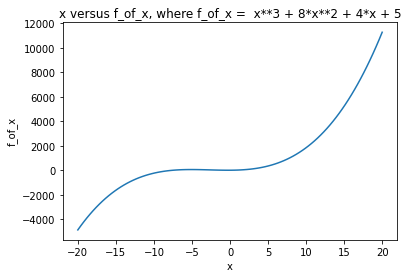

In [185]:
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.xlabel('x')
plt.ylabel('f_of_x')
plt.title('x versus f_of_x, where f_of_x =  x**3 + 8*x**2 + 4*x + 5')

Text(0.5, 1.0, 'x versus derivative(f_of_x)')

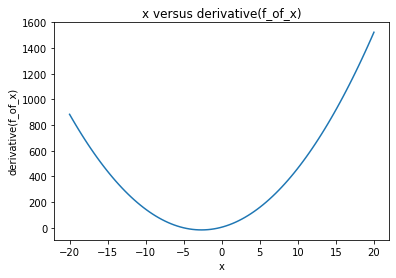

In [186]:
plt.plot(x.detach().numpy(), x.grad)
plt.xlabel('x')
plt.ylabel('derivative(f_of_x)')
plt.title('x versus derivative(f_of_x)')